## Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
plt.style.use('seaborn-v0_8')

-------

In [8]:
df=pd.read_csv(r'C:\Users\abhij\Desktop\CV_Project\Timeseries Analysis\DF_dataframe_final.csv')

In [9]:
df.shape

(59118, 272)

In [10]:
# Having a look at only relevant columns
X = df[['ITEM','ITEM_CODE','SEGMENT','SECTOR','BRAND','ITEM_DESCRIPTION','CATEGORY','date','VOLUME']]
X.head()

,ITEM,ITEM_CODE,SEGMENT,SECTOR,BRAND,ITEM_DESCRIPTION,CATEGORY,date,VOLUME
0,Woolworths Air Care 0012844067194,12844067194,Other Car,AUTO FRESHENER,Refresh Your Car,Refresh Your Car Strawberry And Lemon 71g,Air Care,2019-04-07,20732.0
1,Woolworths Air Care 0012844067194,12844067194,Other Car,AUTO FRESHENER,Refresh Your Car,Refresh Your Car Strawberry And Lemon 71g,Air Care,2019-04-14,18034.0
2,Woolworths Air Care 0012844067194,12844067194,Other Car,AUTO FRESHENER,Refresh Your Car,Refresh Your Car Strawberry And Lemon 71g,Air Care,2019-04-21,18105.0
3,Woolworths Air Care 0012844067194,12844067194,Other Car,AUTO FRESHENER,Refresh Your Car,Refresh Your Car Strawberry And Lemon 71g,Air Care,2019-04-28,17821.0
4,Woolworths Air Care 0012844067194,12844067194,Other Car,AUTO FRESHENER,Refresh Your Car,Refresh Your Car Strawberry And Lemon 71g,Air Care,2019-05-05,17040.0


-----------

- **Questions:**
    - How many segments/sector are there  ?
    - How many category/brands are there ?
      

In [12]:
print("No. of Segments: ",len(X['SEGMENT'].unique()))
print("No. of Sectors: ",len(X['SECTOR'].unique()))

No. of Segments:  16
No. of Sectors:  4


In [13]:
print("No. of Categories: ",len(X['CATEGORY'].unique()))
print("No. of Brands: ",len(X['BRAND'].unique()))

No. of Categories:  1
No. of Brands:  32


- **Questions:**
    - Can a same item be present in different segment ?
      
      

In [9]:
item = df['ITEM_CODE'].unique()
for item in df['ITEM_CODE'].unique():
    if len(df[df['ITEM_CODE']==item]['SEGMENT'].unique())==1:
        pass
    else:
        print(item)

- *Each segment contains mutually exclusive items*

------------
- **Questions**:
    - Descriptives about each segment
        - No.of unique items
        - Mean Volumne
        - Start and ending date of sale 

In [16]:
item_info={}
item_info['item']=[]
item_info['SEGMENT']=[]
item_info['mean_vol']=[]
item_info['begin_date']=[]
item_info['end_date']=[]

for item in X['ITEM_CODE'].unique():
    item_info['item'].append(item)
    item_info['SEGMENT'].append(X[X['ITEM_CODE']==item]['SEGMENT'].unique()[0])
    item_info['mean_vol'].append(X[X['ITEM_CODE']==item]['VOLUME'].mean())
    item_info['begin_date'].append(X[X['ITEM_CODE']==item]['date'].min())
    item_info['end_date'].append(X[X['ITEM_CODE']==item]['date'].max())
    
item_info = pd.DataFrame(item_info)

In [17]:
x=[]
y=[]
for segment in item_info['SEGMENT'].unique():
    count = item_info[item_info['SEGMENT']==segment].shape[0]
    x.append(segment)
    y.append(count)
    # print(f"No. of items in {segment} are: {count}")
segment_count = pd.DataFrame({'Count':y,'Segment':x}).sort_values(by='Count',ascending=False)

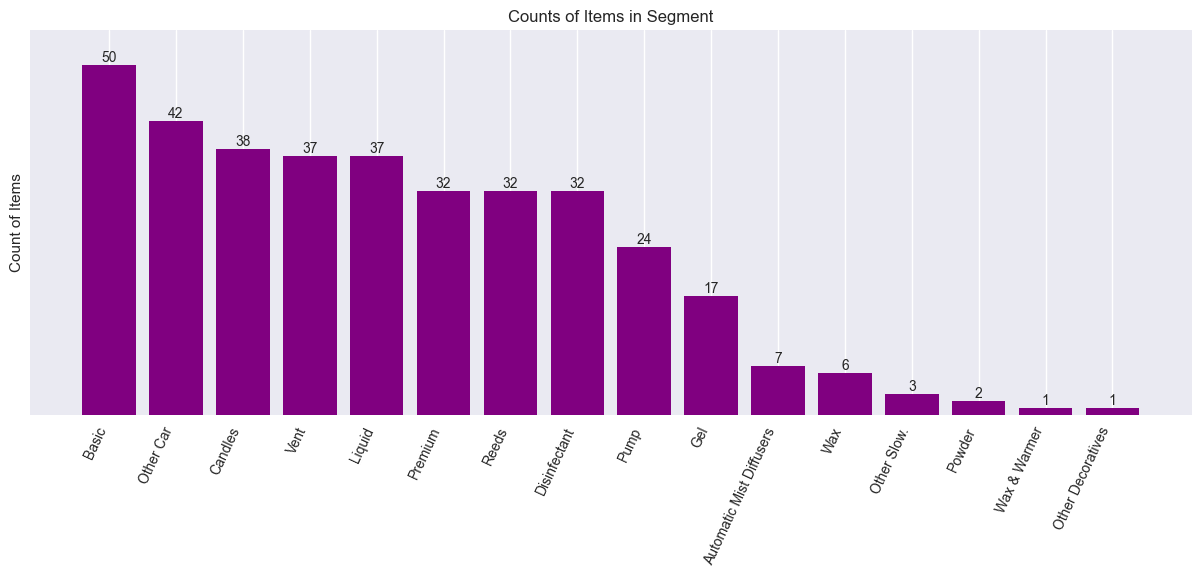

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
bar_container = ax.bar(segment_count['Segment'],segment_count['Count'],color=['purple'])
ax.set(ylabel='Count of Items', title='Counts of Items in Segment', ylim=(0, 55),yticks=[])
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=65, ha='right')
plt.show()

- Above plot shows count of items present in each segment.
    - We can clearly conclude from the plot that most of the items belongs to **Basic**, **Other Car** or **Candles** segment.

In [24]:
def show_items_in_segment(segment,item_info):
    x = item_info[item_info['SEGMENT']==segment]['item']
    y = item_info[item_info['SEGMENT']==segment]['mean_vol']
    
    fig, ax = plt.subplots(figsize=(20,8))
    bar_container = ax.bar([str(i) for i in x],[int(i) for i in y],color=['g'])
    ax.set(ylabel='Mean Volume', title=f"Mean Volume of Items in Segment: '{segment}'",yticks=[])
    ax.bar_label(bar_container ,fmt='{:,.0f}',rotation=90,label_type='edge',padding=5)
    plt.xticks(rotation=90, ha='right')
    plt.show()

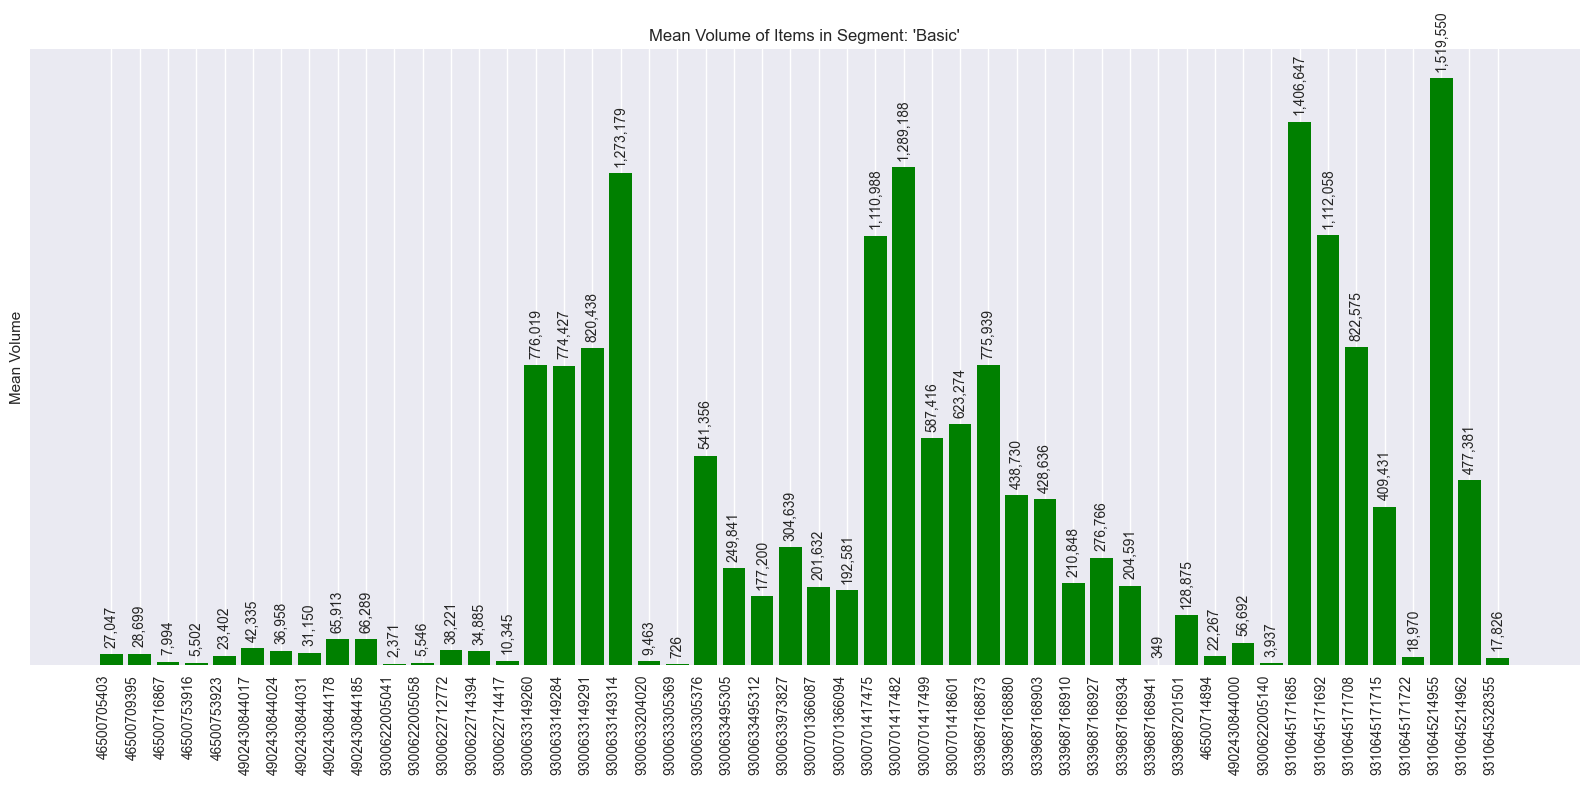

In [25]:
show_items_in_segment('Basic',item_info)

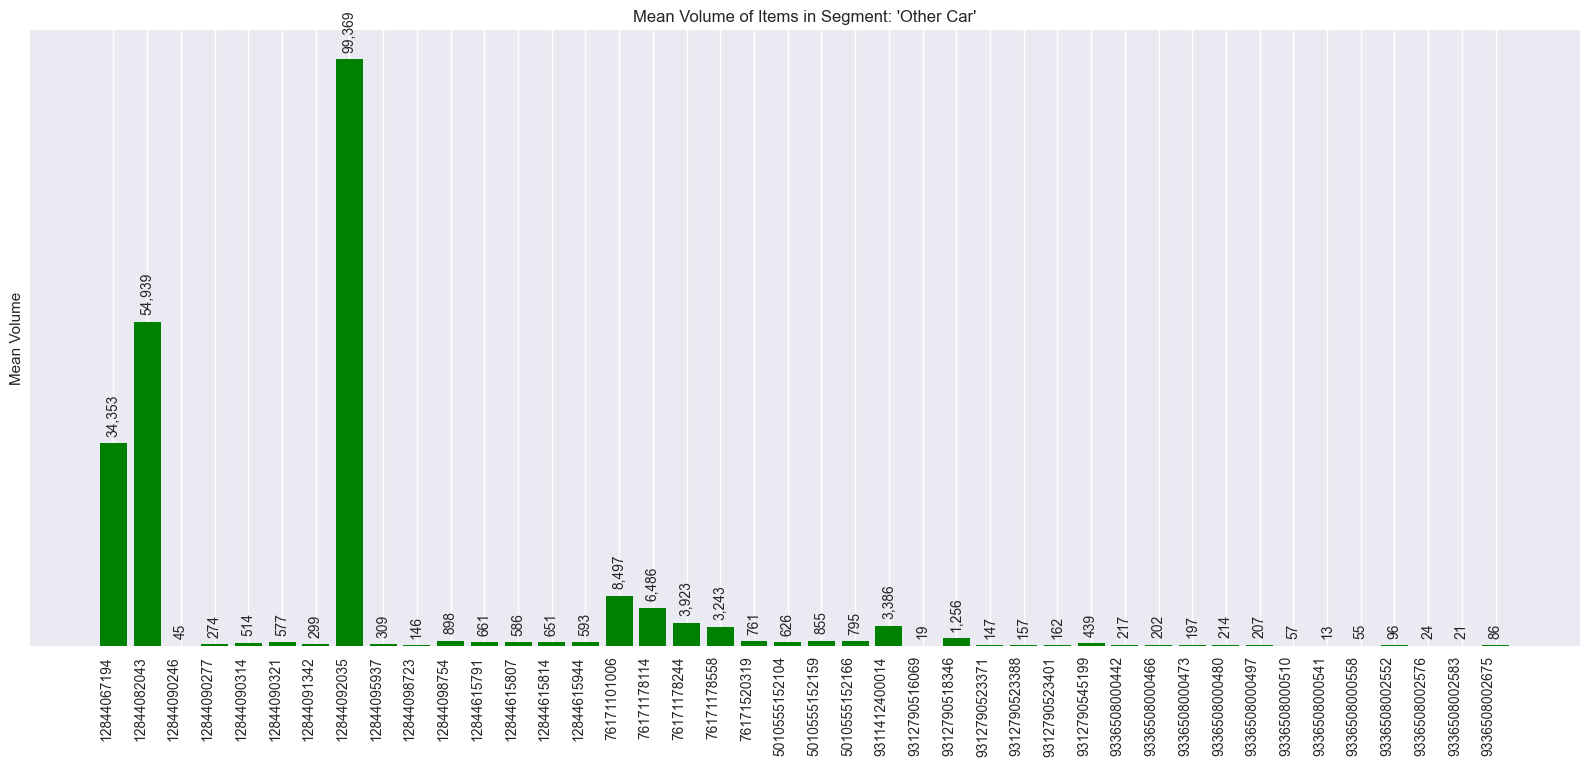

In [26]:
show_items_in_segment('Other Car',item_info)

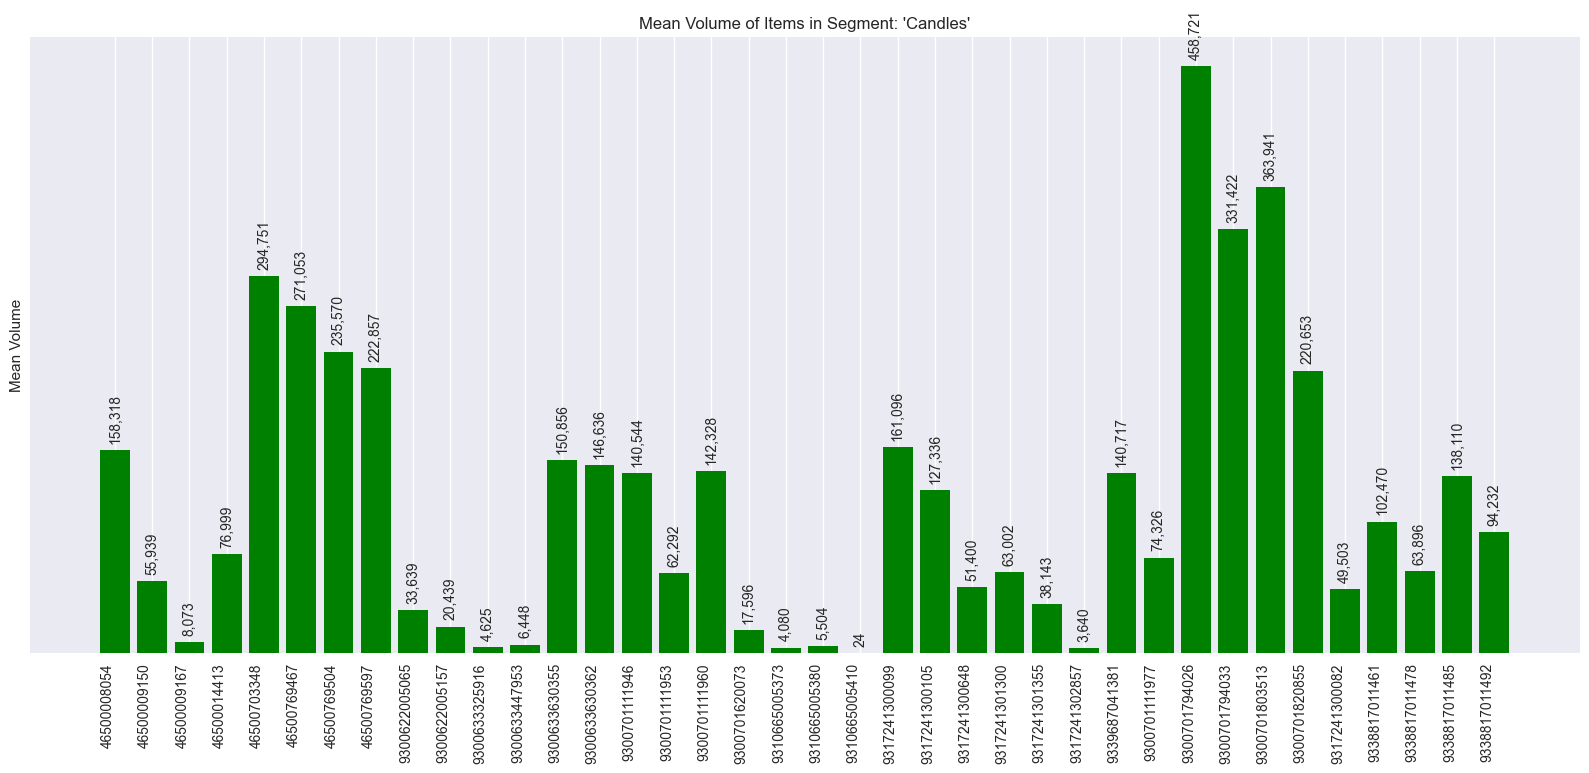

In [27]:
show_items_in_segment('Candles',item_info)

----

- From the above plots we can clearly see that items have different means across the segments.
    - Similar pattern can be seen across all the segments.